In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.drop(columns="Postal Code",inplace=True)

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


Statistical Description of the Data

In [6]:
df.describe(include="all")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


Data Cleaning

In [8]:
#to check missing values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Duplicate Data

In [9]:
df.duplicated().sum()

50

In [10]:
#Show duplicated rows
df[df.duplicated(keep='last')]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
218,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,302.376,3,0.20,22.6782
568,Standard Class,Corporate,United States,Seattle,Washington,West,Office Supplies,Paper,19.440,3,0.00,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,West,Office Supplies,Paper,10.368,2,0.20,3.6288
845,First Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.00,6.8714
925,First Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Paper,15.552,3,0.20,5.4432
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,East,Office Supplies,Paper,15.552,3,0.20,5.4432
1037,First Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,36.624,3,0.20,13.7340
1103,Standard Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Binders,2.934,3,0.80,-4.9878
1143,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Paper,6.480,1,0.00,3.1104
1186,Standard Class,Corporate,United States,Seattle,Washington,West,Office Supplies,Paper,25.920,4,0.00,12.4416


In [11]:
#Drop duplicated rows
df.drop_duplicates(inplace=True)
#Find no. of rows and columns
df.shape

(9944, 12)

In [12]:
#Calculate Profit Margin
df['Profit Margin %']=(df.Profit/df.Sales)*100
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


<Axes: xlabel='Region'>

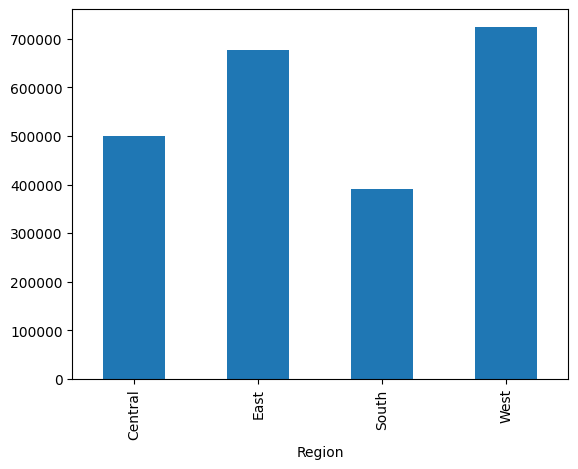

In [13]:
#Sales Analysis based on Region
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Region'>

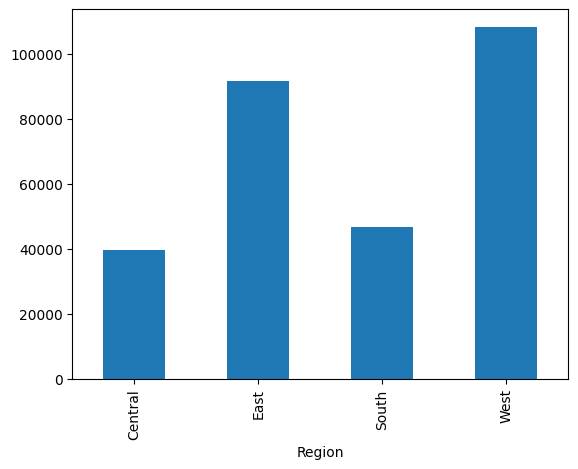

In [14]:
#Profit Analysis based on Region
df.groupby("Region")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

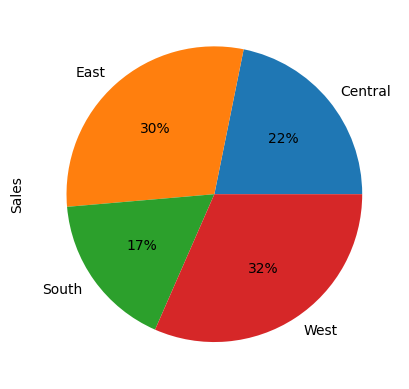

In [15]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

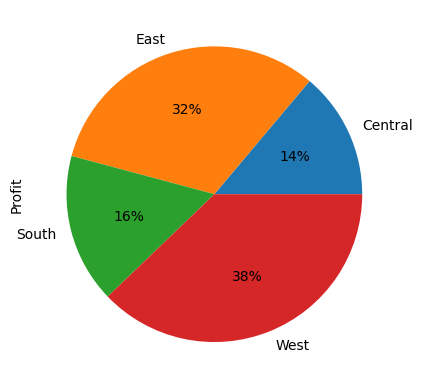

In [16]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Segment'>

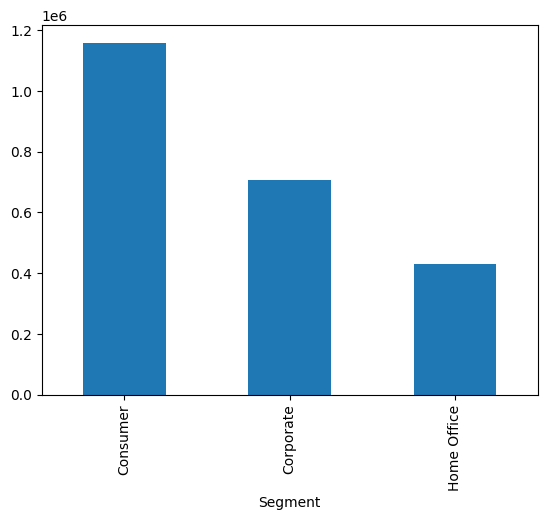

In [17]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<Axes: xlabel='Segment'>

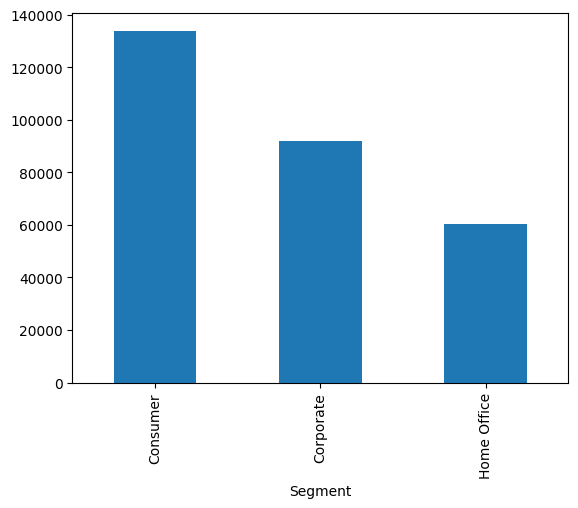

In [18]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<Axes: xlabel='Category'>

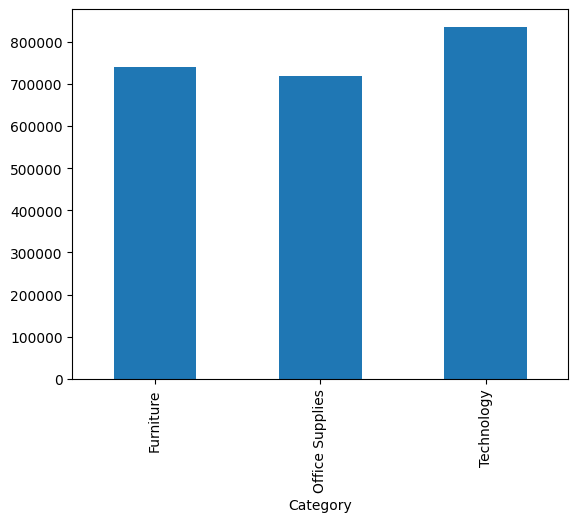

In [19]:
df.groupby("Category")["Sales"].sum().plot.bar()

<Axes: xlabel='Category'>

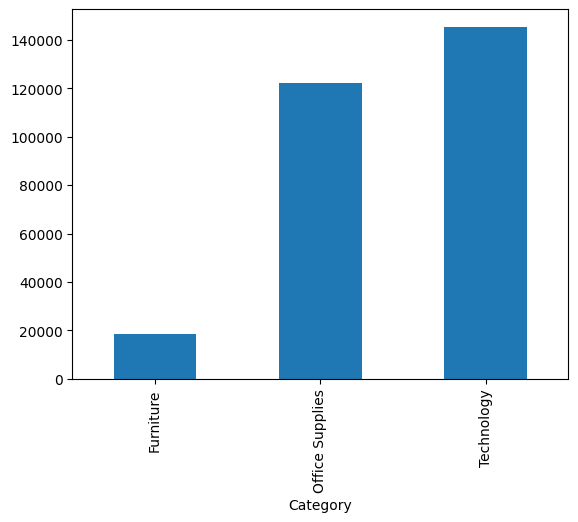

In [20]:
df.groupby("Category")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

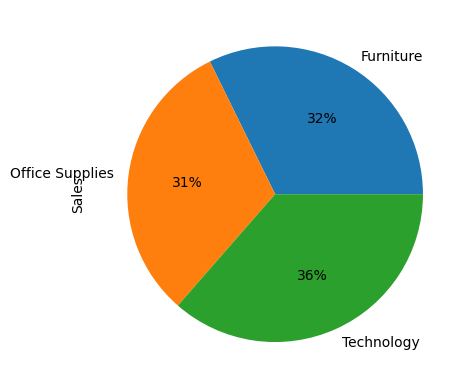

In [21]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

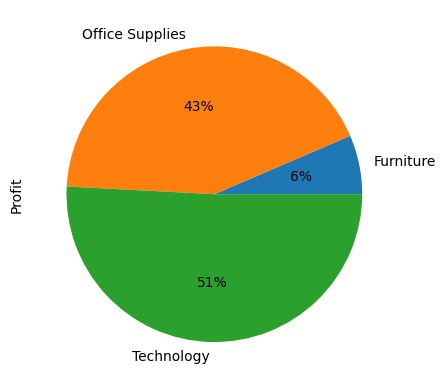

In [22]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='State'>

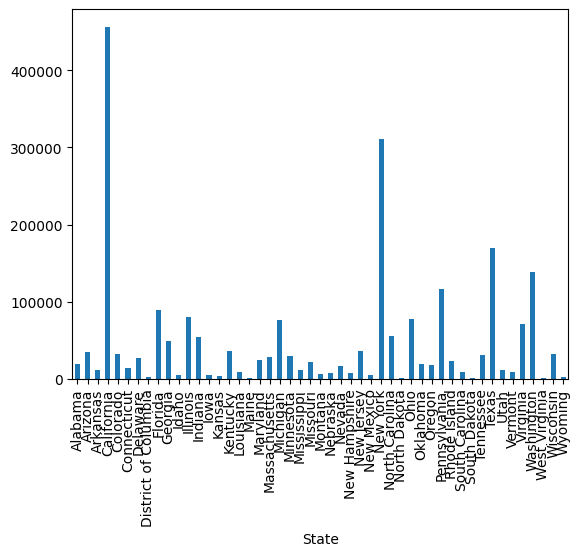

In [23]:
df.groupby("State")["Sales"].sum().plot.bar()

<Axes: xlabel='State'>

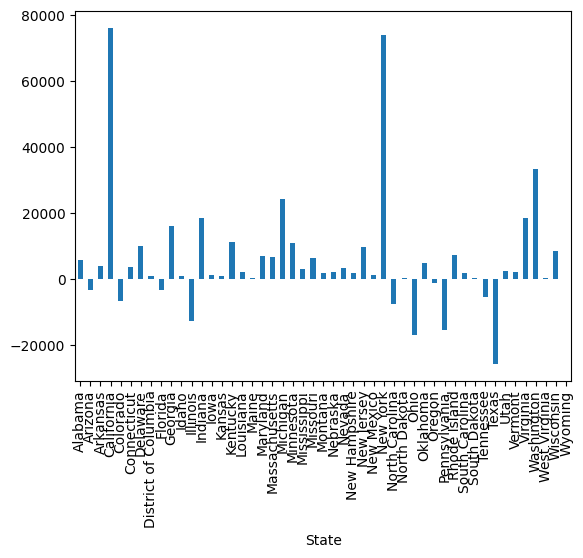

In [24]:
df.groupby("State")["Profit"].sum().plot.bar()

In [25]:
category_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,740568.6663,18484.9459,8010
Office Supplies,718256.0700,122196.0726,22786
Technology,835774.6410,145416.5394,6932


Exploratory Data Analysis

In [26]:
#Which Category is Best Selling and Most Profitable?
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,740568.6663,18484.9459,8010
Office Supplies,718256.0700,122196.0726,22786
Technology,835774.6410,145416.5394,6932


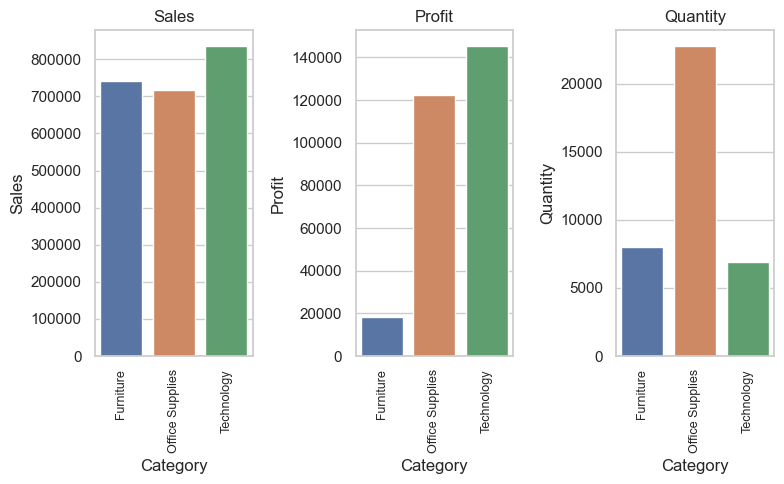

In [27]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

In [28]:
#What are the Best Selling and Most Profitable Sub-Category?
# Group by sub-category
subcat_analysis = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,329704.6780,44493.0524
Chairs,327777.7610,26567.1278
Storage,223808.4400,21287.1788
Tables,206965.5320,-17725.4811
Binders,203328.8590,30205.2603
Machines,189238.6310,3384.7569
Accessories,167303.3020,41920.9052
Copiers,149528.0300,55617.8249
Bookcases,114166.9293,-3398.7542


In [29]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,329704.6780,44493.0524
Accessories,167303.3020,41920.9052
Paper,77960.8940,33830.0381
Binders,203328.8590,30205.2603
Chairs,327777.7610,26567.1278
Storage,223808.4400,21287.1788
Appliances,107532.1610,18138.0054
Furnishings,91658.4440,13042.0534


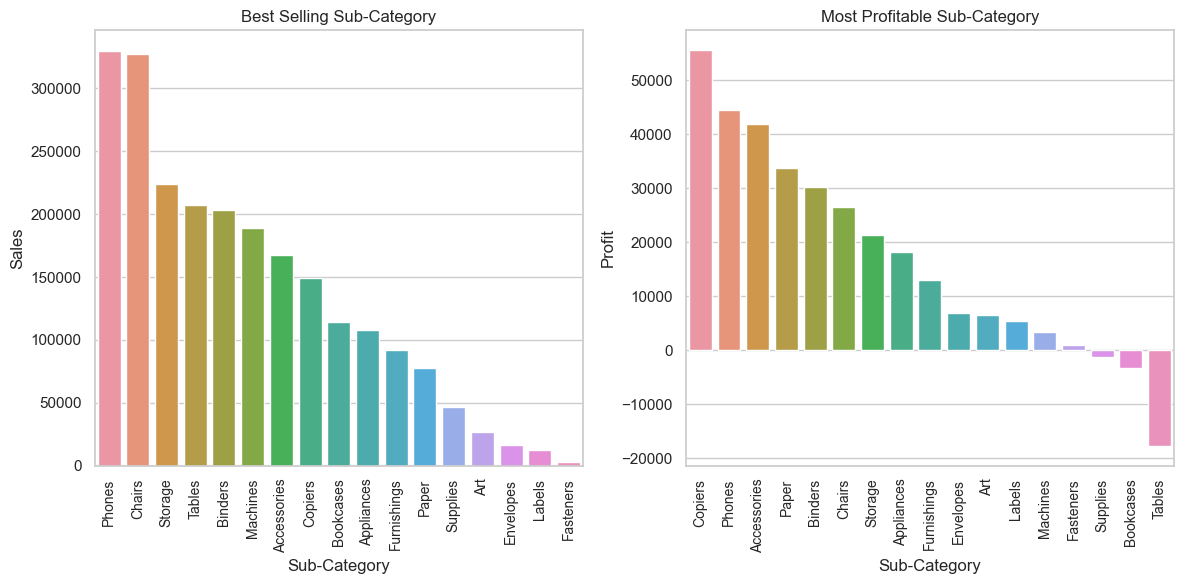

In [30]:
#Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

In [31]:
#Which is the Top Selling Sub-Category?
subcat_quantity = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5961
Paper,5100
Furnishings,3555
Phones,3286
Storage,3156
Art,2986
Accessories,2972
Chairs,2351
Appliances,1729


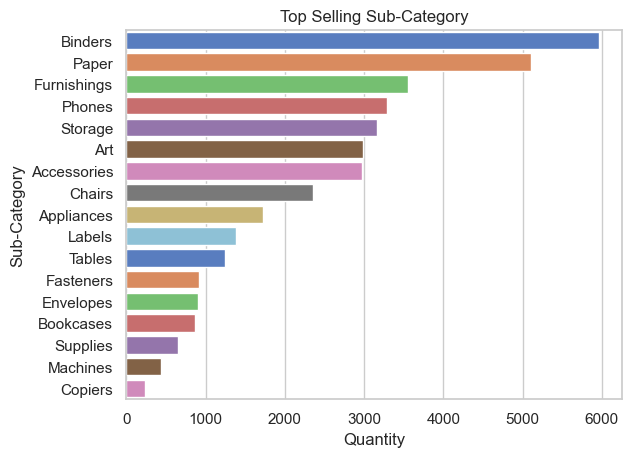

In [32]:
#Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

In [33]:
#Which Customer Segment is Most Profitable?
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,133939.5218
Corporate,91911.1606
Home Office,60246.8755


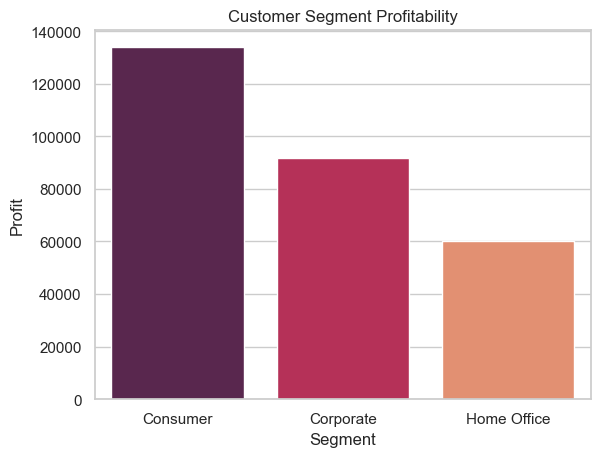

In [34]:
#Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

In [35]:
#Which Region is the Most Profitable?
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39662.0474
1,East,91471.0909
2,South,46749.4303
3,West,108214.9893


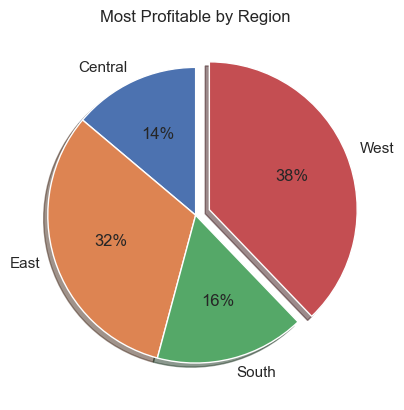

In [36]:
#Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()